In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
import imblearn
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
targets = data.Class.value_counts()
print('No Fraud:{}'.format(targets[0]))
print('Fraud: {}'.format(targets[1]))
print('All Transactions: {}'.format(targets.sum()))
print('No Fraud percent: {}'.format(targets[0]*100/targets.sum()))
print('Fraud percent: {}'.format(targets[1]*100/targets.sum()))

No Fraud:284315
Fraud: 492
All Transactions: 284807
No Fraud percent: 99.827251436938
Fraud percent: 0.1727485630620034


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Text(0, 0.5, 'Probability')

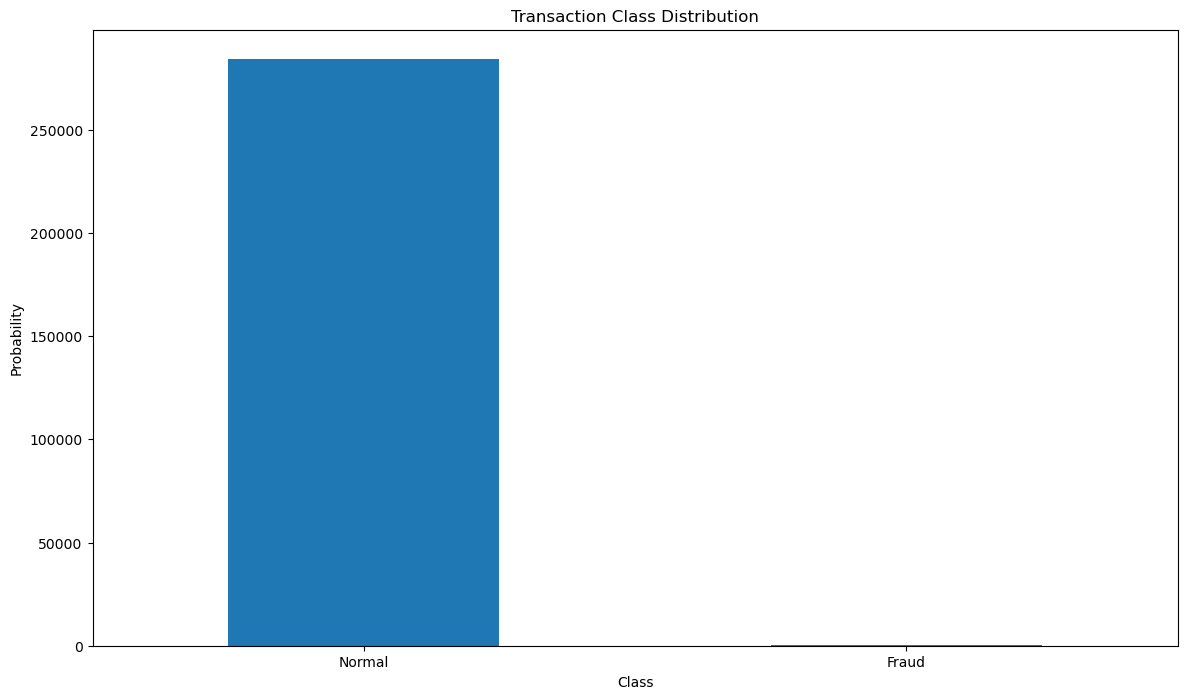

In [9]:
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Probability")

In [10]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [11]:
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [11]:
# Observing if any meaningful co-realtion exists between the amount of transaction and occurance of fraud

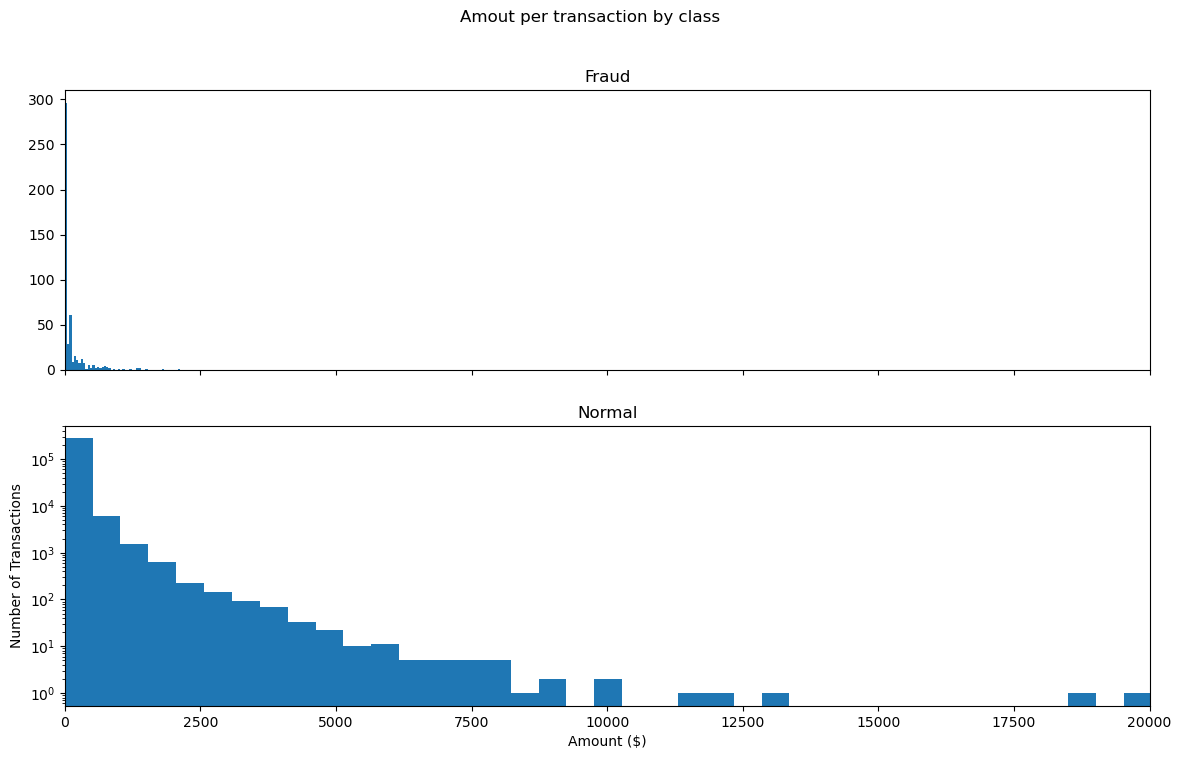

In [12]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle('Amout per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim(0,20000)
plt.yscale('log')
plt.show()

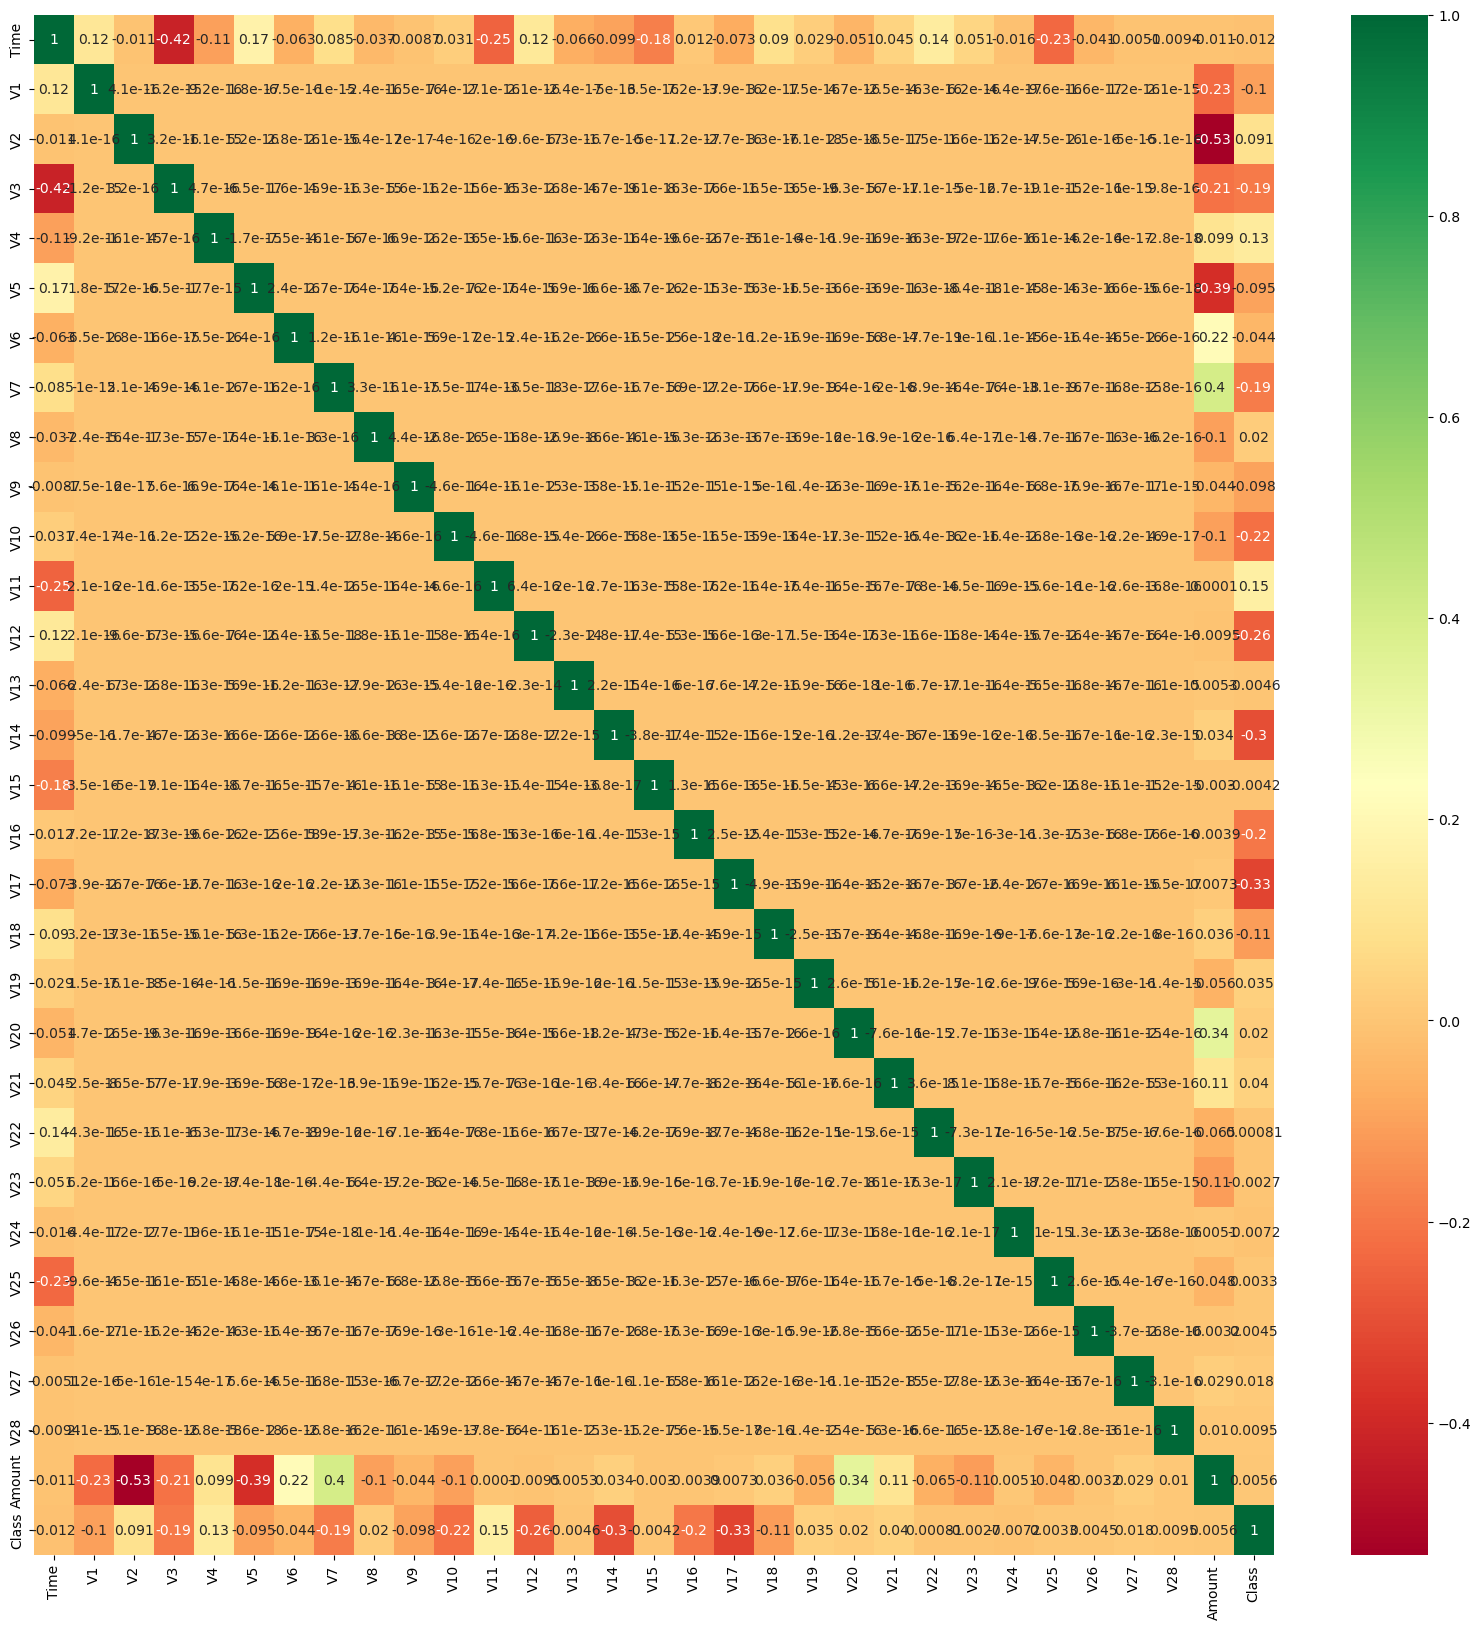

In [13]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [14]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
state = np.random.RandomState(42)
x = data[columns]
y = data[target]
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)
outlier_proportion = len(fraud)/float(len(normal))

Isolation Trees

The algorithm builds isolation trees, which are binary trees recursively built by randomly selecting a feature and then randomly selecting a split value for that feature within the range of its values. The process continues until each instance in the dataset is isolated in a leaf node. Multiple isolation trees are created, and their predictions are combined to form an ensemble. Anomalies are expected to have shorter average path lengths across the trees and lower scores.

In [16]:
model = IsolationForest(n_estimators=100, max_samples=len(x_train), 
                        contamination=outlier_proportion, random_state=state, verbose=0)

In [17]:
model.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.0017304750013189597, max_samples=227845,
                random_state=RandomState(MT19937) at 0x28E0D079D40)

In [18]:
scores_prediction = model.decision_function(x_test)
y_pred = model.predict(x_test)

In [19]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y_test).sum()

In [20]:
n_errors

137

In [21]:
print("Isolation Forest", n_errors)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Score:\n", classification_report(y_test, y_pred))

Isolation Forest 137
Accuracy Score: 0.9975948878199501
Classification Score:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.36      0.39      0.37       106

    accuracy                           1.00     56962
   macro avg       0.68      0.69      0.69     56962
weighted avg       1.00      1.00      1.00     56962



In [22]:
def plot_2d_space(x_loc, y_loc, label='Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y_loc), colors, markers):
        plt.scatter(
            x_loc[y_loc==l, 0],
            x_loc[y_loc==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Dataset X shape (284807, 2) , Y shape:  (284807,)


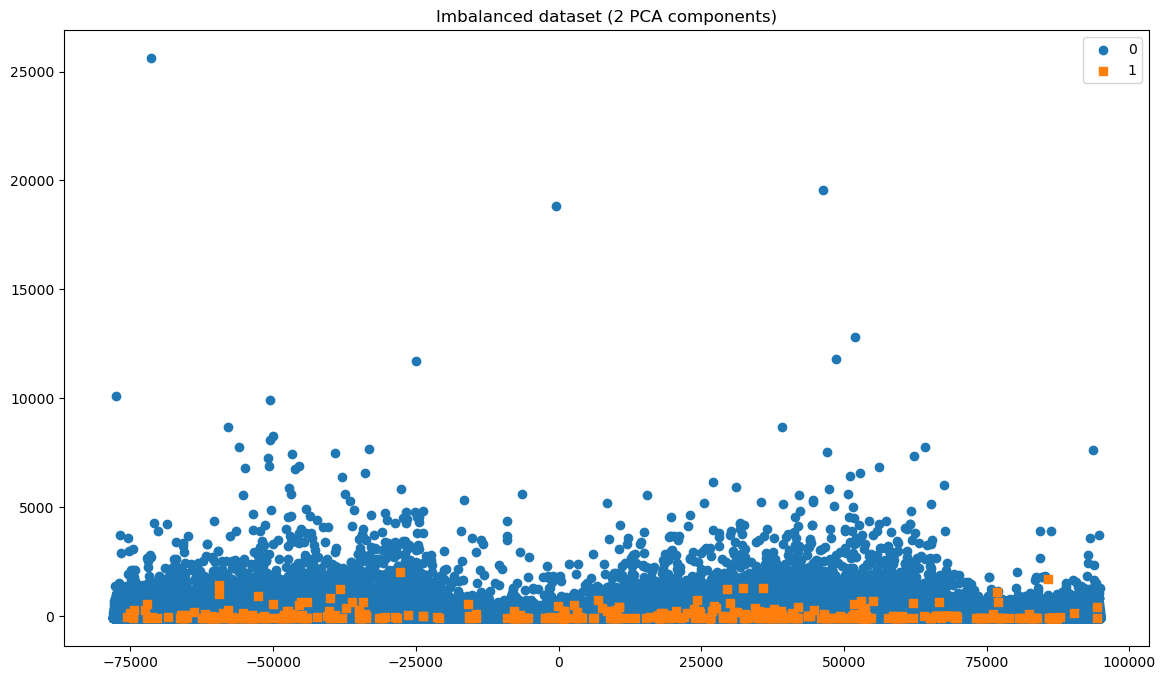

In [23]:
labels_test = data.columns[:30]
x = data[labels_test]
y = data['Class']

pca = PCA(n_components=2)
x = pca.fit_transform(x)
print("Dataset X shape", x.shape,", Y shape: ", y.shape)

plot_2d_space(x,y, 'Imbalanced dataset (2 PCA components)')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [24]:
x_train.shape

(227845, 30)

In [25]:
y_train.shape

(227845,)

In [26]:
import numpy as np

# Assuming X_train and Y_train are NumPy arrays
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)

# Check if the shapes are different
if x_train.shape[0] != y_train.shape[0] :
    # Find the minimum number of rows between X_train and Y_train
    min_rows = min(x_train.shape[0], y_train.shape[0])
    
    # Trim both arrays to have the same number of rows
    x_train = x_train[:min_rows, :]
    y_train = y_train[:min_rows]
    
print("X_train shape after alignment:", x_train.shape)
print("Y_train shape after alignment:", y_train.shape)    

x_train shape (227845, 30)
y_train shape (227845,)
X_train shape after alignment: (227845, 30)
Y_train shape after alignment: (227845,)


In [28]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x_train, y_train) 
print("Dataset X shape ", x.shape, "Y shape ", y.shape)
print("Over Sampling Dataset X shape", x_ros.shape, "Y shape", y_ros.shape)
print(x_ros.shape[0] - x.shape[0], 'new random picked points')

plot_2d_space(x_ros, y_ros, 'Random over-sampling')

Dataset X shape  (284807, 2) Y shape  (284807,)
Over Sampling Dataset X shape (454918, 30) Y shape (454918,)
170111 new random picked points


InvalidIndexError: (0          True
1          True
2          True
3          True
4          True
          ...  
454913    False
454914    False
454915    False
454916    False
454917    False
Name: Class, Length: 454918, dtype: bool, 0)

In [30]:
x_train.shape

(227845, 30)

In [31]:
y_train.shape

(227845,)

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model.fit(x_ros, y_ros)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.41%


Confusion matrix:
 [[54822  2034]
 [   12    94]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_5956\4267306850.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5956\4267306850.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


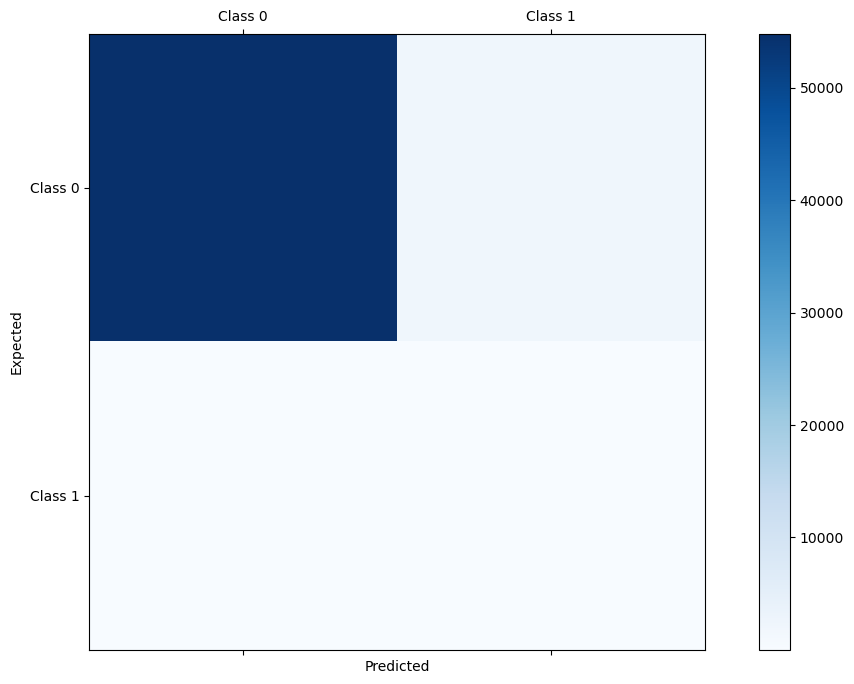

Accuracy Non Fraud detection: 96.42%
Accuracy Fraud detection: 88.68%


In [33]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

percent_0 = conf_mat[0][0]*100/(conf_mat[0][1]+conf_mat[0][0])
percent_1 = conf_mat[1][1]*100/(conf_mat[1][1]+conf_mat[1][0])

print('Accuracy Non Fraud detection: {:.2f}%'.format(percent_0))
print('Accuracy Fraud detection: {:.2f}%'.format(percent_1))